In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy
from astropy.io import fits
import os
from astropy.timeseries import LombScargle
import glob
import pathlib
from astroquery.mast import Observations
from astropy import units as u
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
from astropy.coordinates import SkyCoord
from tqdm import tqdm
import pickle
import lightkurve as lk
import scipy.stats as stats
import traceback
from scipy.signal import find_peaks
from IPython.display import Image, display
import scipy
import lightkurve
from astropy import units
from astropy.io import fits
# import exoplanet as xo

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/caleb/opt/anaconda3/envs/astron/lib/python3.10/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/caleb/.lightkurve/cache. Please move all the files in the legacy directory /Users/caleb/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [4]:
def get_paths(file_type):
    cwd = os.getcwd()
    current_dir = pathlib.Path(cwd)
    all_paths = []
    for num in range(998):
        if file_type == 'obs':
            file_paths = [str(i) for i in list(current_dir.glob(f"lightkurve_data/heavy_data/{num}_*_lc.fits"))]
        if file_type == 'perio':
            file_paths = [str(i) for i in list(current_dir.glob(f"lightkurve_data/heavy_data/perio_data/perio/{num}_*pkl"))]
        if file_type == 'psd':
            file_paths = [str(i) for i in list(current_dir.glob(f"lightkurve_data/heavy_data/perio_data/psd/{num}_*pkl"))]
        if file_type == 'flat':
            file_paths = [str(i) for i in list(current_dir.glob(f"lightkurve_data/heavy_data/perio_data/flat/{num}_*.pkl"))]
        if file_type == 'threshold':
            file_paths = [str(i) for i in list(current_dir.glob(f"lightkurve_data/heavy_data/perio_data/thresholds/{num}_*.pkl"))]

        all_paths.append(file_paths)


    # for num in range(512):
    #     if file_type == 'obs':
    #         file_paths = [str(i) for i in list(current_dir.glob(f"lightkurve_data/{num}_*_lc.fits"))]
    #     if file_type == 'perio':
    #         file_paths = [str(i) for i in list(current_dir.glob(f"lightkurve_data/perio_data/perio/{num}_*pkl"))]
    #     if file_type == 'psd':
    #         file_paths = [str(i) for i in list(current_dir.glob(f"lightkurve_data/perio_data/psd/{num}_*pkl"))]
    #     if file_type == 'flat':
    #         file_paths = [str(i) for i in list(current_dir.glob(f"lightkurve_data/perio_data/flat/{num}_*.pkl"))]
    #     if file_type == 'threshold':
    #         file_paths = [str(i) for i in list(current_dir.glob(f"lightkurve_data/perio_data/thresholds/{num}_*.pkl"))]

    #     all_paths.append(file_paths)  
    
    return all_paths

In [2]:
# check for rotations
cwd = os.getcwd()
current_dir = pathlib.Path(cwd)

file_paths = [str(i) for i in list(current_dir.glob(f"improved_figures/star_*_observation_1_of_*_strong_rotation.png"))]


In [71]:
len(file_paths)

998

In [83]:
lc.flux.value

array([41169.5  , 41047.86 , 41107.793, ..., 40895.04 , 40866.81 ,
       40922.402], dtype=float32)

In [6]:
def has_three_continuous_integers(lst):
    lst.sort()  # Sort the list to ensure consecutive numbers are adjacent

    for i in range(len(lst) - 2):
        if lst[i] + 1 == lst[i + 1] == lst[i + 2] -1:
            return True

    return False


In [7]:
file_paths=get_paths('obs')
rotate = 0
non=0
flares_list = 0
brightness = []
for i in tqdm(file_paths):
    if len(i)>0:
        lc = lightkurve.io.read(f'{i[0]}')
        brightness.append(np.mean(lc.flux.value))
        normalized = lc.remove_nans().normalize()
        flat_lc, trend_lc = normalized.flatten(window_length=101, polyorder=3, return_trend=True, break_tolerance=5, niters=3, sigma=3)
        npe = normalized.to_periodogram().flatten(filter_width=1)
        # flat_lc.plot()

        flux = flat_lc.flux.value
        print(flux)
        time = flat_lc.time.value
        std = stats.median_abs_deviation(flux)
        print('std',std)
        flares = np.where(flux>(3*std+1))
        print(flares[0])
        flares = np.array(flares[0])

        # plt.rcParams['figure.figsize'] = (20, 6)
        # plt.scatter(time,flux)
        # plt.scatter(time[flares],flux[flares],color='red',s=1)
        # plt.show()

        # print(flares)

        # npe.plot()
        # plt.xscale('log')
        # plt.show()
        if np.max(npe.power.value) > 5:
            rotate +=1
        else:
            non +=1

        if has_three_continuous_integers(flares):
            print("Flare")
            flares_list +=1 

  0%|          | 1/998 [00:01<17:48,  1.07s/it]

[0.99925258 1.00177156 1.00152852 ... 1.00008015 0.998961   0.99895365]
std 0.0010869301291136502
[    11     13    119 ... 113215 113241 113299]
Flare


  1%|          | 5/998 [00:01<05:29,  3.02it/s]

[0.9991023  1.00172732 1.00163507 ... 1.00154546 0.99873366 0.99966276]
std 0.0008400481462981224
[    30    194    204 ... 117406 117444 117629]
Flare


  1%|          | 6/998 [00:02<07:13,  2.29it/s]

[0.99815312 1.00546413 0.99978405 ... 1.00062481 0.9977315  1.00007537]
std 0.002092834798194998
[     3     20     45 ... 117574 117599 117619]
Flare


  1%|          | 8/998 [00:03<07:04,  2.33it/s]

[1.00082168 0.99786754 1.00046742 ... 0.99937863 1.00243849 0.99922106]
std 0.0007615729726545561
[     8     51     69 ... 117620 117643 117686]
Flare


  1%|          | 9/998 [00:04<08:12,  2.01it/s]

[1.00011234 1.00016023 0.99977258 ... 0.99987865 1.00004061 1.00014291]
std 0.0002459668054909381
[    10     43     52 ... 107896 107901 107963]
Flare


  1%|          | 10/998 [00:04<09:12,  1.79it/s]

[1.00032166 0.99957746 0.99862191 ... 1.00094469 1.00057853 0.99975424]
std 0.0006571613743583948
[     5     96    116 ... 107882 107886 107895]
Flare


  1%|▏         | 13/998 [00:05<06:36,  2.48it/s]

[0.99994694 0.99974597 1.0002238  ... 0.99992097 1.00054449 0.99937397]
std 0.00022075408163291232
[    30    104    109 ... 107912 107944 107957]
Flare


  1%|▏         | 14/998 [00:06<07:43,  2.12it/s]

[0.99990653 1.0002104  1.00127659 ... 1.00087567 0.99821496 1.00038548]
std 0.0005467284862631372
[    18     44     63 ... 107870 107887 107889]
Flare


  2%|▏         | 17/998 [00:07<05:50,  2.80it/s]

[0.99982637 0.999865   1.00031161 ... 1.00034034 1.00022604 1.00000984]
std 0.00026152719257854784
[   82   276   286 ... 75769 75885 75899]
Flare


  2%|▏         | 20/998 [00:07<05:01,  3.24it/s]

[0.99921496 0.99921232 0.9958569  ... 1.00167015 1.00090772 0.9985207 ]
std 0.0011692715498651252
[    8    31    71 ... 85205 85403 85502]
Flare


  2%|▏         | 21/998 [00:08<06:13,  2.62it/s]

[1.00044785 0.9992048  0.99977058 ... 0.99907592 0.99997135 1.00061869]
std 0.00029641686467862804
[     8     81    120 ... 107700 107747 107963]
Flare


  3%|▎         | 25/998 [00:09<04:52,  3.33it/s]

[1.00534344 0.99880336 0.9973864  ... 0.99946186 0.99977091 1.00042216]
std 0.0009597872010971287
[     0      8     10 ... 116940 116957 116991]
Flare


  3%|▎         | 28/998 [00:10<04:35,  3.52it/s]

[0.9994091  0.99891429 1.00008017 ... 0.9976529  0.99787456 0.99988335]
std 0.0008478912763012492
[   31    73    77 ... 95760 95776 95837]
Flare


  3%|▎         | 28/998 [00:10<06:05,  2.66it/s]


KeyboardInterrupt: 

In [8]:
m_dwarf_sample = pd.read_csv('/Users/caleb/research/Astro_98/m_dwarf_sample_with_files_powers.csv',delimiter=',',index_col=0)
ra = np.array(m_dwarf_sample[m_dwarf_sample.columns[0]])
dec = np.array(m_dwarf_sample[m_dwarf_sample.columns[1]])

names = np.array(m_dwarf_sample[m_dwarf_sample.columns[2]])
masses = np.array(m_dwarf_sample[["Mass"]])
comps = [i[0].strip() for i in np.array(m_dwarf_sample[["Comp"]])]

ras = [i.replace(' ',':') for i in ra]
decs = [i.replace(' ',':') for i in dec]

coords = []
for i in range(len(decs)):
    coords.append(ras[i]+" "+decs[i])

m_dwarf_sample =m_dwarf_sample.drop(columns=['file paths','power arrays'])

In [21]:
all_star_sample = pd.read_csv('/Users/caleb/research/Astro_98/all_stars_mags_mass.csv',delimiter=',',index_col=0)
all_star_sample=all_star_sample.reset_index()
names = np.array(all_star_sample['SimbadName'])
masses = np.array(all_star_sample[["Mass"]])
comps = [i[0].strip() for i in np.array(all_star_sample[["Comp"]])]


In [22]:
all_star_sample

,CNS5,GJ,Comp,NComp,P?,GJp,GaiaDR3,HIP,RAJ2000,DEJ2000,...,Jmag,Hmag,Ksmag,W1mag,W2mag,W3mag,W4mag,SimbadName,Mass,distance
0,5187,815.0,,,0,,1873073175244118784,103655,315.025944,40.069067,...,6.668,6.089,5.880,5.810,5.570,5.590,5.449,HIP 103655,0.516904,15.017270
1,5321,834.0,B,2,0,,1953952387283004544,106694,324.159174,39.454946,...,7.111,6.496,6.302,6.193,6.013,6.054,5.944,HIP 106694,0.437353,20.859408
2,5322,834.0,A,2,1,,1953952391581618432,106694,324.159531,39.454990,...,7.111,6.496,6.302,6.193,6.013,6.054,5.944,HIP 106694,0.437353,20.772746
3,5353,836.8,,,0,,1954559047126247808,107346,326.124477,41.597644,...,7.070,6.422,6.289,6.187,6.134,6.201,6.121,HIP 107346,0.439857,19.825535
4,5127,806.0,,,0,,2070115588901082368,102401,311.269785,44.500273,...,7.329,6.769,6.533,6.409,6.169,6.239,6.296,HIP 102401,0.393008,12.059817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,912,146.0,,,0,,4833654227548585856,16711,53.756625,-48.417775,...,6.122,5.493,5.338,5.227,5.123,5.250,5.160,HIP 16711,0.602055,13.599891
994,819,132.0,,,0,,4847282124418880256,15131,48.775787,-45.664191,...,5.635,5.361,5.273,5.224,5.095,5.293,5.232,HIP 15131,0.609891,24.515813
995,906,145.0,,,0,,4846689899968623744,16536,53.230791,-44.701350,...,7.741,7.213,6.907,6.788,6.587,6.539,6.352,HIP 16536,0.324151,10.968520
996,919,1061.0,,,0,,4848140361962951552,,54.003394,-44.514362,...,7.523,7.015,6.610,,,,,Gaia DR3 4848140361962951552,0.378425,3.673904


In [10]:
search_result = lightkurve.search_lightcurve('GJ 231B',exptime='fast',mission='TESS')

Could not resolve GJ 231B to a sky position.


In [6]:
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 29,2020,SPOC,20,141810080,0.0
1,TESS Sector 30,2020,SPOC,20,141810080,0.0
2,TESS Sector 31,2020,SPOC,20,141810080,0.0
3,TESS Sector 32,2020,SPOC,20,141810080,0.0
4,TESS Sector 33,2020,SPOC,20,141810080,0.0
5,TESS Sector 39,2021,SPOC,20,141810080,0.0
6,TESS Sector 37,2021,SPOC,20,141810080,0.0
7,TESS Sector 38,2021,SPOC,20,141810080,0.0
8,TESS Sector 35,2021,SPOC,20,141810080,0.0


In [4]:
m_dwarf_sample[130:140]

,RAJ2000,DEJ2000,Name,Comp,2MASS,Conf,l_Sep,Sep,PA,Date,...,Hmag,e_Hmag,Kmag,e_Kmag,n_Kmag,Mass,e_Mass,n_Mass,Memb,SimbadName
132,06 00 03.52,+02 42 23.6,G 99-49,,06000351+0242236,,,,,,...,6.308,0.023,6.042,0.023,,0.237,0.014,,s,G 99-49
133,06 01 11.05,+59 35 49.9,LHS 1805,,06011106+5935508,,,,,,...,6.949,0.029,6.639,0.018,,0.275,0.014,,s,LHS 1805
134,06 02 29.18,+49 51 56.2,LHS 1809,,06022918+4951561,,,,,,...,8.768,0.029,8.435,0.020,,0.134,0.014,,s,LHS 1809
135,06 04 52.16,-34 33 36.0,AP COL,,06045215-3433360,,,,,,...,7.183,0.018,6.866,0.021,,0.279,0.014,,s,AP COL
136,06 10 14.50,-74 45 11.0,GJ 231,B,,AB,,3.0200,,,...,,,,,,0.140,0.010,e,mc,GJ 231
137,06 10 52.89,-43 24 17.8,GJ 1088,,06105288-4324178,,,,,,...,7.582,0.065,7.312,0.016,,0.296,0.014,,s,GJ 1088
138,06 10 54.80,+10 19 06.0,GJ 228,B,,AB,,2.6000,,,...,,,,,,0.242,0.017,v,mc,GJ 228
139,06 14 02.36,+51 40 08.0,G 192-22,,06140240+5140081,,,,,,...,8.360,0.023,8.122,0.038,,0.264,0.015,,s,G 192-22
140,06 15 11.98,-16 26 15.6,LP 779-34,,06151198-1626152,,,,,,...,8.672,0.036,8.387,0.023,,0.190,0.014,,s,LP 779-34
141,06 17 05.29,+83 53 35.3,LSPM 0617+8353,,06170531+8353354,,,,,,...,8.365,0.020,8.110,0.015,,0.245,0.024,,s,LSPM J0617+8353


In [11]:
# drop problematic rows
def clean_table(m_dwarf_sample):

    # strange normalization --> created very high frequencies

    m_dwarf = False
    if m_dwarf:
        m_dwarf_sample = m_dwarf_sample.drop(219)
        m_dwarf_sample = m_dwarf_sample.drop(354)

        # transits
        m_dwarf_sample = m_dwarf_sample.drop(358)
        m_dwarf_sample = m_dwarf_sample.drop(359)
        m_dwarf_sample = m_dwarf_sample.drop(880)

    else:
        m_dwarf_sample = m_dwarf_sample.drop(873)
        m_dwarf_sample = m_dwarf_sample.drop(880)

    return m_dwarf_sample

In [141]:
flats= get_paths('flat')
big = 0
for i in flats:
    if len(i) != 0:
        with open(i[0],'rb') as f:
            pw = pickle.load(f)
            print(np.max(pw))
            if np.max(pw) > 4:
                big +=1


2.7160267344563405
2.9784053280391602
3.2429055948494536
2.2347215432037397
3.3807730163930896
2.912315067717597
3.109938831899733
2.2165206444618786
1.6858064730170566
2.2544678591408105
1.6976200733649904
2.0722100219607547
1.897085899718714
3.076371578303748
2.5101793640371945
1.686164749978395
2.146173771475814
3.130052256852267
3.809294017878365
4.398161260307365
2.2974908639228864
3.173013529869115
3.087680879451467
2.7253235201137986
3.2624930230728237
2.7215025628658527
3.0840514063968256
2.8961516060316534
2.17731707285804
2.754637759625051
3.2512207855184236
2.361515961328382
2.1232929776195872
3.0337788137860215
3.359559690684064
3.3244011446224304
3.1222146670798328
3.032127426624659
2.544273868696179
3.0955504024371954
3.2620859744988797
1.9636749420508184
2.5015449920728
1.3345835003305129
1.7052317034173483
1.5090842198987497
2.3208364036027302
1.8935717109804648
1.5512342196624536
1.6931230146426333
1.9893901770988927
3.0030579843127763
1.305198539820532
3.2513720728115

In [33]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 20
plt.rcParams['figure.figsize'] = (8, 6)

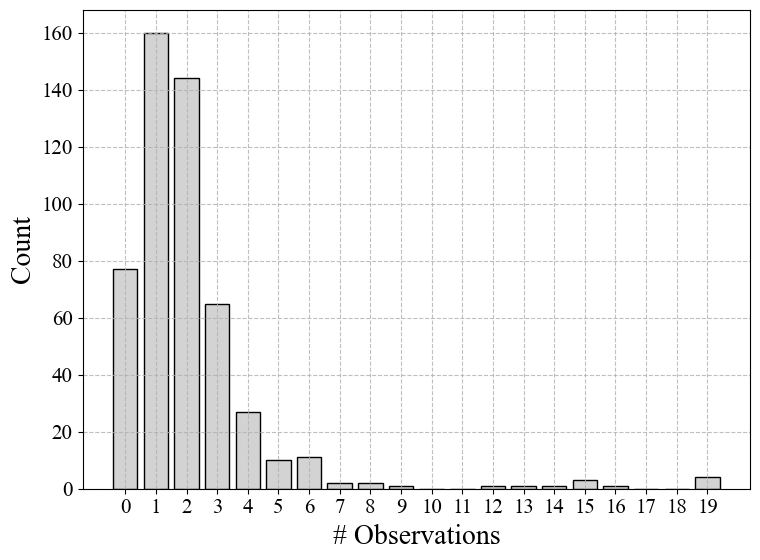

In [34]:
obs = get_paths('obs')
observations = [len(i) for i in obs]
num_observations = np.histogram(observations,bins=np.arange(0,21,1))
plt.bar(x=list(np.arange(0,20,1)),height=list(num_observations[0]), edgecolor='black', color='lightgray')
plt.xticks(list(np.arange(0,20,1)))
plt.xlabel("# Observations")
plt.ylabel("Count")
plt.grid(ls='--',alpha=.8)
plt.tick_params(which='both',labelsize=15)
plt.tight_layout()
plt.savefig('/Users/caleb/Desktop/98Graphs/#obsS1')
plt.show()

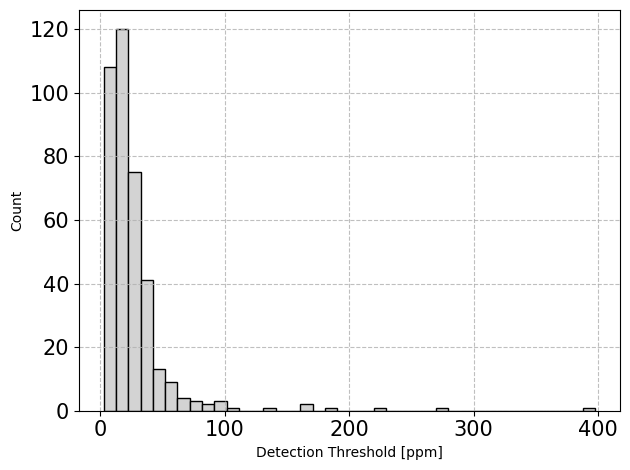

In [12]:
# plot threshold levels
thresholds = get_paths('threshold')
thresholds_list = []
for i in thresholds:
    if len(i) != 0:
        with open(i[0],'rb') as f:
            pw = pickle.load(f)
        thresholds_list.append(pw)
    else:
        thresholds_list.append(-1)



thresholds_list =np.array(thresholds_list)
indices = np.where((thresholds_list<500)&(thresholds_list>0))
plt.grid(ls='--',alpha=.8)

plt.hist(thresholds_list[indices],bins=40, edgecolor='black', color='lightgray')
plt.xlabel("Detection Threshold [ppm]")
plt.ylabel("Count")
# plt.title("Detection Thresholds Histogram")
# plt.xscale('log')
plt.tick_params(which='both',labelsize=15)
plt.tight_layout()
plt.savefig('/Users/caleb/Desktop/98Graphs/#DetectionS2')

plt.show()

998

In [44]:
low_ppm = all_star_sample.iloc[np.where((thresholds_list>0)&(thresholds_list<10))[0]]

In [47]:
low_ppm['threshold'] = np.array(thresholds_list)[np.where((thresholds_list>0)&(thresholds_list<10))[0]]
low_ppm['paths'] = np.array(file_paths)[np.where((thresholds_list>0)&(thresholds_list<10))[0]]

/var/folders/8w/z7zsz3tj76jd_p19pfzbwj5c0000gn/T/ipykernel_93588/1835849927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_ppm['threshold'] = np.array(thresholds_list)[np.where((thresholds_list>0)&(thresholds_list<10))[0]]
/var/folders/8w/z7zsz3tj76jd_p19pfzbwj5c0000gn/T/ipykernel_93588/1835849927.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  low_ppm['paths'] = np.array(file_paths)[np.where((thresholds_list>0)&(thresholds_list<10))[0]]
/var/folders/8w/z7zsz3tj76jd_p19pfzbwj5c0000gn/T/ipykernel_93588/1835849927.py:

In [70]:
low_ppm.reset_index().head(60)

,index,CNS5,GJ,Comp,NComp,P?,GJp,GaiaDR3,HIP,RAJ2000,...,Ksmag,W1mag,W2mag,W3mag,W4mag,SimbadName,Mass,distance,threshold,paths
0,8,5711,13330.0,A,2,1,,1935133906477014016,114456,347.708110,...,5.281,5.245,5.107,5.276,5.230,HIP 114456,0.608962,23.534949,7.729916,[/Users/caleb/research/Astro_98/lightkurve_dat...
1,12,5919,4382.0,,,0,,1940954617956840192,118162,359.528069,...,5.141,5.135,4.929,5.164,5.102,HIP 118162,0.623650,24.533857,6.917671,[/Users/caleb/research/Astro_98/lightkurve_dat...
2,16,4859,12850.0,A,2,1,,2142179058450057856,96395,293.981684,...,5.220,,,,,HIP 96395,0.615778,23.934897,3.472393,[/Users/caleb/research/Astro_98/lightkurve_dat...
3,20,4763,1233.0,,,0,,2143016302194287488,94346,288.049118,...,5.202,5.150,4.990,5.200,5.182,HIP 94346,0.617670,20.206102,4.586965,[/Users/caleb/research/Astro_98/lightkurve_dat...
4,30,5004,786.0,,,0,,2290483248388179328,99427,302.719560,...,5.667,,,,,HIP 99427,0.553790,16.823688,6.922956,[/Users/caleb/research/Astro_98/lightkurve_dat...
5,31,5621,13281.0,,,0,,2299942278201276288,112527,341.876680,...,5.449,,,,,HIP 112527,0.587248,19.538882,6.912173,[/Users/caleb/research/Astro_98/lightkurve_dat...
6,64,768,3194.0,A,2,1,,466294295706341760,14286,46.046926,...,5.027,5.013,4.874,5.037,5.004,HIP 14286,0.632920,23.534949,6.536666,[/Users/caleb/research/Astro_98/lightkurve_dat...
7,67,366,56.5,,,0,,560130775546153344,6379,20.495635,...,5.159,5.171,5.025,5.195,5.106,HIP 6379,0.621956,16.995241,5.477888,[/Users/caleb/research/Astro_98/lightkurve_dat...
8,93,4174,651.0,,,0,,1359938520253565952,83389,255.652487,...,5.003,4.985,4.916,5.022,4.978,HIP 83389,0.634532,18.261505,4.124343,[/Users/caleb/research/Astro_98/lightkurve_dat...
9,98,4338,685.0,C,3,0,684,1439069444391326208,86087,263.896115,...,6.066,8.630,5.869,5.861,5.756,HIP 86087,0.482494,14.304105,6.171130,[/Users/caleb/research/Astro_98/lightkurve_dat...


In [68]:
lc = lightkurve.search_lightcurve('HIP 81813',exptime='fast',mission='TESS')

In [72]:
bright_psd = get_paths('psd')[20]

In [69]:
lc

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 40,2021,SPOC,20,230123572,0.0
1,TESS Sector 47,2021,SPOC,20,230123572,0.0
2,TESS Sector 48,2022,SPOC,20,230123572,0.0
3,TESS Sector 49,2022,SPOC,20,230123572,0.0
4,TESS Sector 50,2022,SPOC,20,230123572,0.0
5,TESS Sector 51,2022,SPOC,20,230123572,0.0
6,TESS Sector 52,2022,SPOC,20,230123572,0.0
7,TESS Sector 53,2022,SPOC,20,230123572,0.0
8,TESS Sector 54,2022,SPOC,20,230123572,0.0


4


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

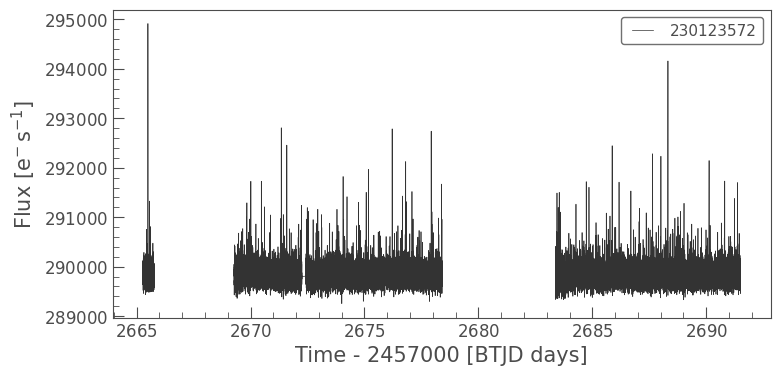

In [67]:
p = list(low_ppm['paths'])[12][0]
print((list(low_ppm['paths'])[4]))
lc = lightkurve.io.read(f'{p}')
lc.plot()

In [43]:
len(thresholds_list[np.where((thresholds_list>0)&(thresholds_list<10))])/len(thresholds_list[np.where((thresholds_list>0))])

65

In [50]:
perios = get_paths('perio')

In [65]:
for i in perios[0:10]:
    with open(i[0],'rb') as f:
        pw = pickle.load(f)
        print(len(pw),pw)
        npe2 = npe[len(pw):]
        npe2.power = pw
        print(npe2)
        npe2.flatten(filter_width=1).plot()
        plt.show()

269750 [0.31523564 0.31727701 0.3186821  ... 4.17937002 4.12423814 4.07466334]
SNRPeriodogram(ID: 202593310)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 269750 but corresponding boolean dimension is 40867

In [167]:
def split(perio_type,min_mass,max_mass,mass_bin):
    perios = get_paths(perio_type)
    print(len(perios))
    all_star_sample['perios'] = perios
    clean_m_dwarf_sample = clean_table(all_star_sample)

    # mass_bin = .05
    mass_ranges = [np.round(i,2) for i in np.arange(min_mass,max_mass+mass_bin,mass_bin)]
    print(mass_ranges)
    fig, axs = plt.subplots(5,2,figsize=(20,15))

    raveled = axs.ravel()
    for m in range(len(mass_ranges)-1):
        subset = clean_m_dwarf_sample[(clean_m_dwarf_sample['Mass']>mass_ranges[m]) & (clean_m_dwarf_sample['Mass']<mass_ranges[m+1])]
        perios_subset =subset['perios'].array   
        summed_perio = []
        for i in perios_subset:
            if len(i) != 0:
                with open(i[0],'rb') as f:
                    pw = pickle.load(f)
                summed_perio.append(np.array(pw))

        summed_perio = sum(summed_perio)
        if perio_type == 'perio':
            perio_frequency = np.arange(2, 2160,0.008)
            frequency_hz = [(i*10**6)/(24*60*60) for i in np.array(perio_frequency)]
        else:
            frequency_hz = np.arange(20, 20000,0.008)
        
        # if m % 2 == 0:
        raveled[m].plot(frequency_hz[1000:-1000],summed_perio[1000:-1000]/(np.mean(summed_perio[1000:-1000])),color='black',alpha=.8,label=f'{len(perios_subset)} Stars Summed')
        raveled[m].set_xlabel("Frequency [uHz]")
        raveled[m].set_ylabel("Power")
        raveled[m].set_ylim(0,2)

        raveled[m].legend()
        
            # if m > 1:
            #     axs[m-1][0].plot(frequency_hz[1000:-1000],summed_perio[1000:-1000],color='black',alpha=.8,label=f'{len(perios_subset)} Stars Summed')
            #     axs[m-1][0].set_xlabel("Frequency [uHz]")
            #     axs[m-1][0].set_ylabel("Power")

        # else:
        #     axs[m-1][1].plot(frequency_hz[1000:-1000],summed_perio[1000:-1000],color='black',alpha=.8,label=f'{len(perios_subset)} Stars Summed')
        #     axs[m-1][1].set_xlabel("Frequency [uHz]")
        #     axs[m-1][1].set_ylabel("Power")


        # plt.legend()
        if perio_type=="psd":
            plt.yscale('log')
            plt.xscale('log')
        # plt.title(f"Summed Powers in Mass Range {mass_ranges[m]}-{mass_ranges[m+1]}")

    plt.tight_layout()
    plt.savefig('/Users/caleb/Desktop/98Graphs/Summed')
    plt.show()

998
[0.35, 0.38, 0.4, 0.43, 0.45, 0.48, 0.5, 0.53, 0.55, 0.58, 0.6]


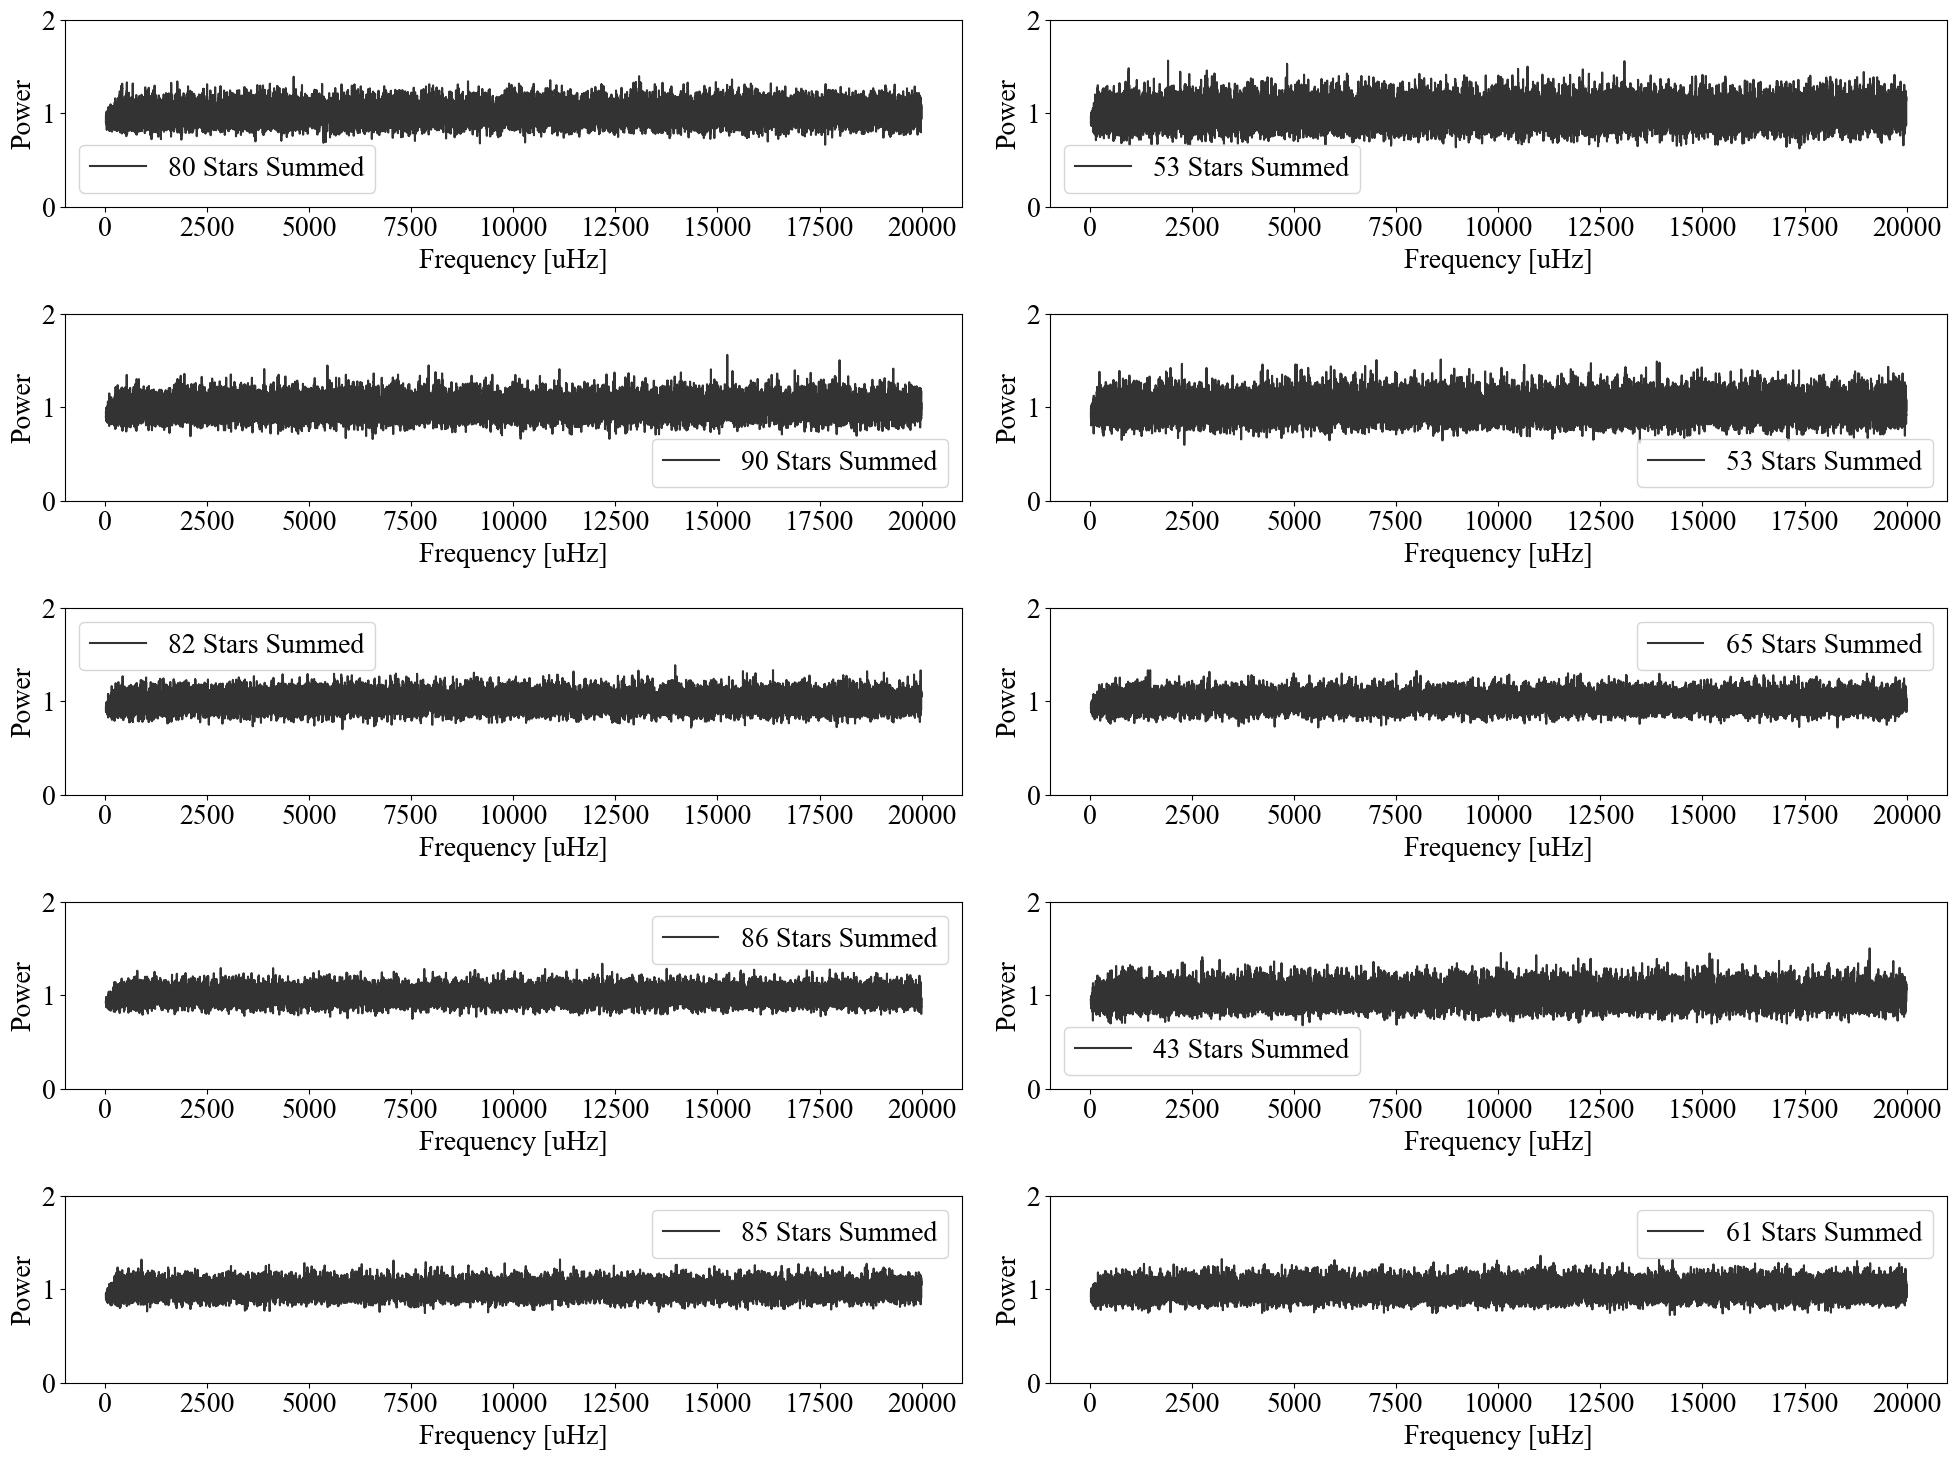

In [161]:
split('flat',.35,.6,.025)

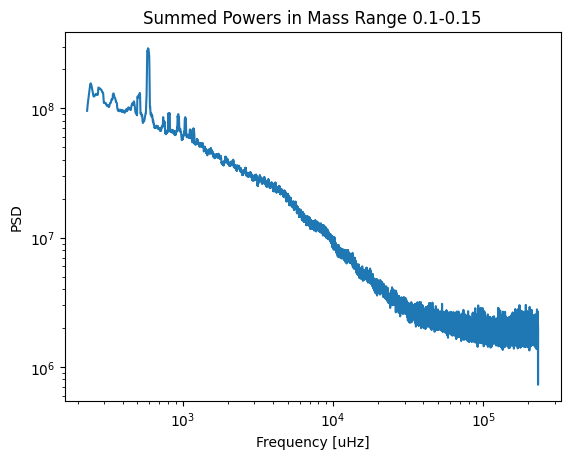

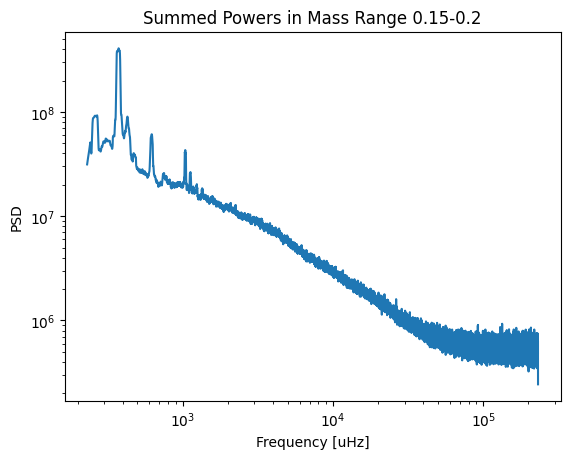

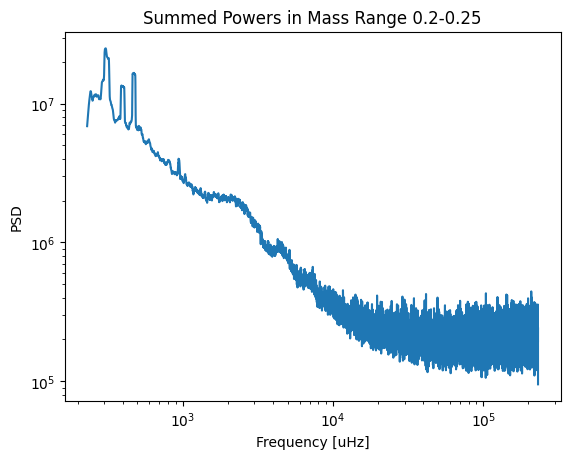

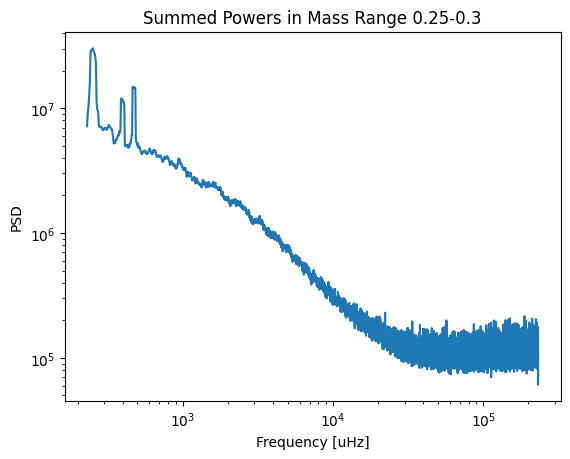

In [252]:
split('psd',.1,.3,.05)

In [125]:
perios = get_paths('flat')

998
     CNS5      GJ  Comp NComp  P?    GJp              GaiaDR3     HIP  \
1    5321   834.0  B        2   0         1953952387283004544  106694   
2    5322   834.0  A        2   1         1953952391581618432  106694   
3    5353   836.8               0         1954559047126247808  107346   
25   5687  1278.0               0         2212272649844661504  113944   
51    955  1064.0  B        2   0          231113740685855616           
..    ...     ...   ...   ...  ..    ...                  ...     ...   
949  5283   827.1               0         6460163255986109056  105905   
969   781  1056.0               0         4723578819956587776   14587   
974  1223  2036.0  A        2   1         4776266794388393472   22738   
976  1438  1084.0               0         4794632903476180096   27323   
982   272    45.0               0         4710180171260274816    4473   

        RAJ2000    DEJ2000  ...   Hmag  Ksmag    W1mag    W2mag    W3mag  \
1    324.159174  39.454946  ...  6.496  6.3

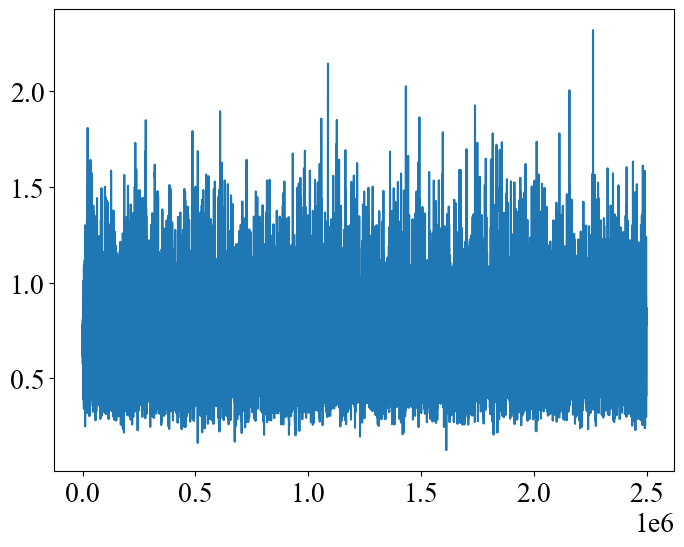

[]
[]
[]
[]
['/Users/caleb/research/Astro_98/lightkurve_data/heavy_data/perio_data/flat/166_flat.pkl']


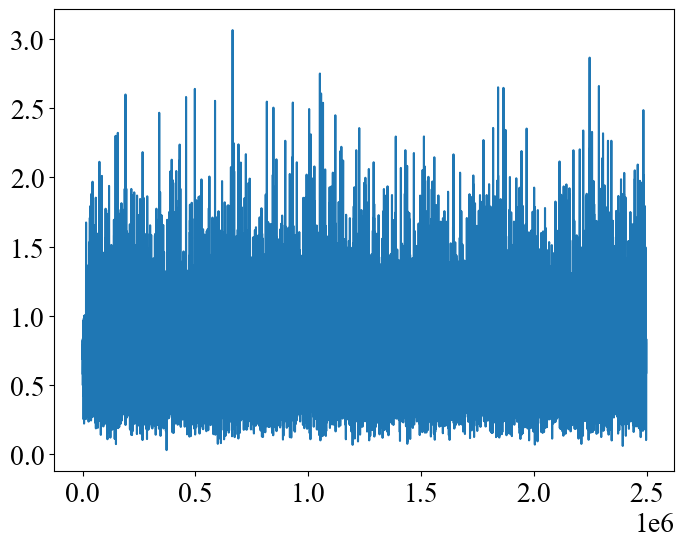

['/Users/caleb/research/Astro_98/lightkurve_data/heavy_data/perio_data/flat/209_flat.pkl']


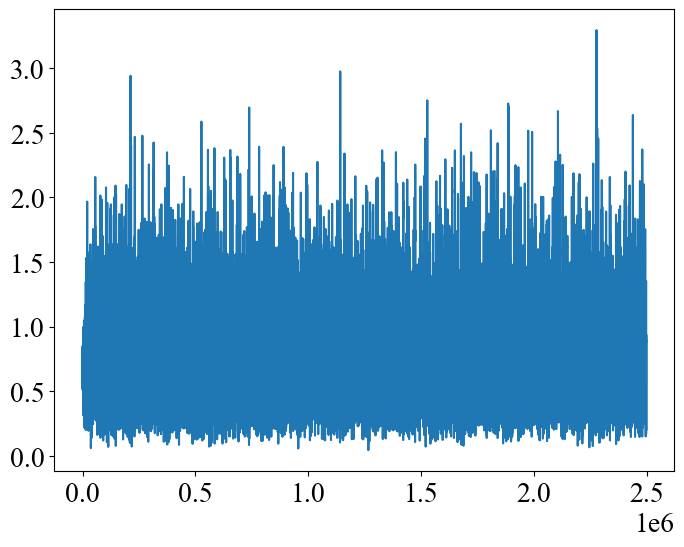

[]
['/Users/caleb/research/Astro_98/lightkurve_data/heavy_data/perio_data/flat/290_flat.pkl']


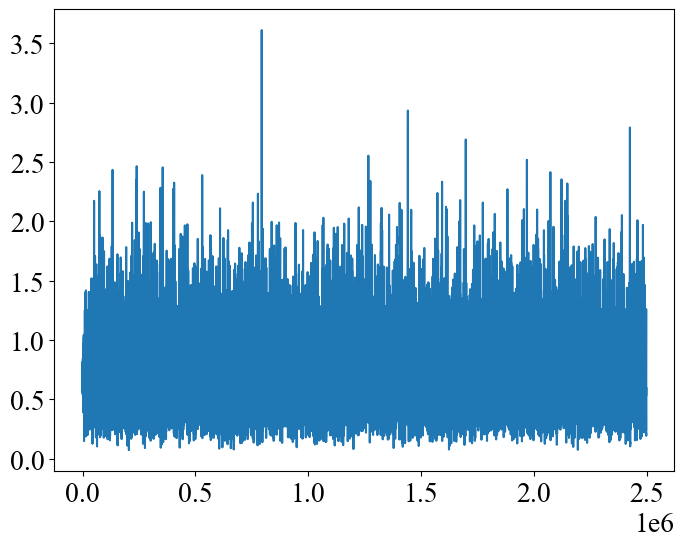

[]
[]
[]
[]
[]
[]
[]
[]
['/Users/caleb/research/Astro_98/lightkurve_data/heavy_data/perio_data/flat/366_flat.pkl']


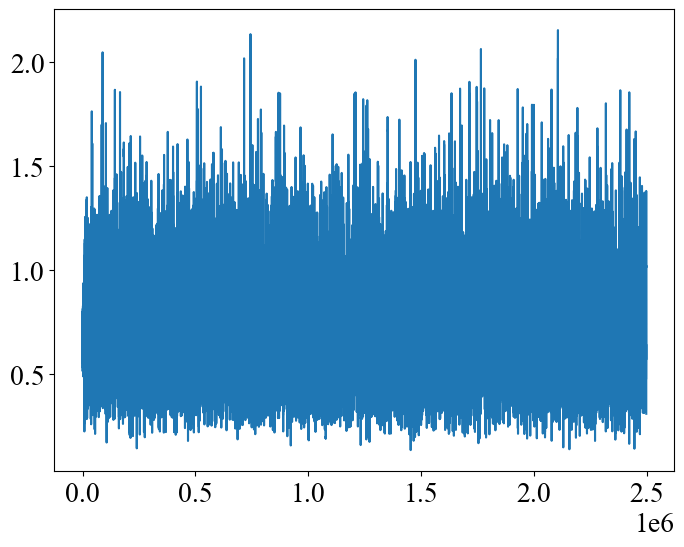

[]
[]
[]
[]
['/Users/caleb/research/Astro_98/lightkurve_data/heavy_data/perio_data/flat/437_flat.pkl']


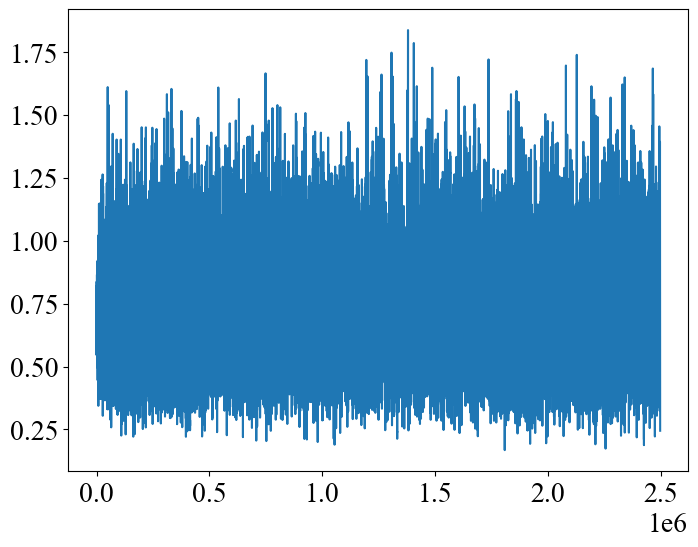

[]
[]
['/Users/caleb/research/Astro_98/lightkurve_data/heavy_data/perio_data/flat/483_flat.pkl']


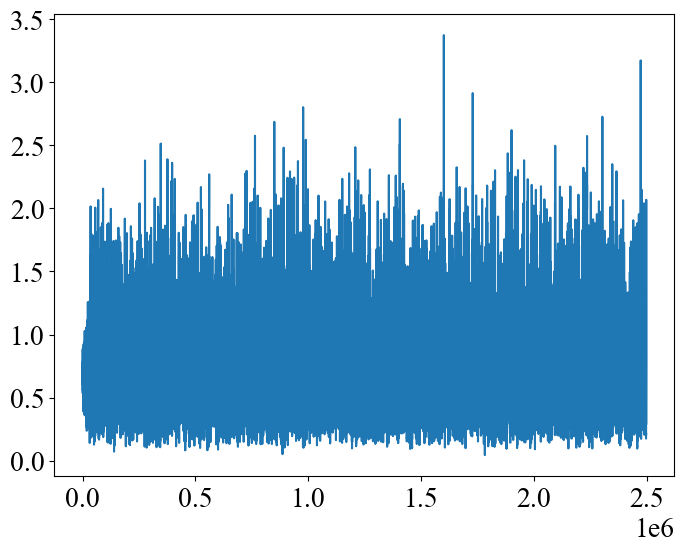

['/Users/caleb/research/Astro_98/lightkurve_data/heavy_data/perio_data/flat/500_flat.pkl']


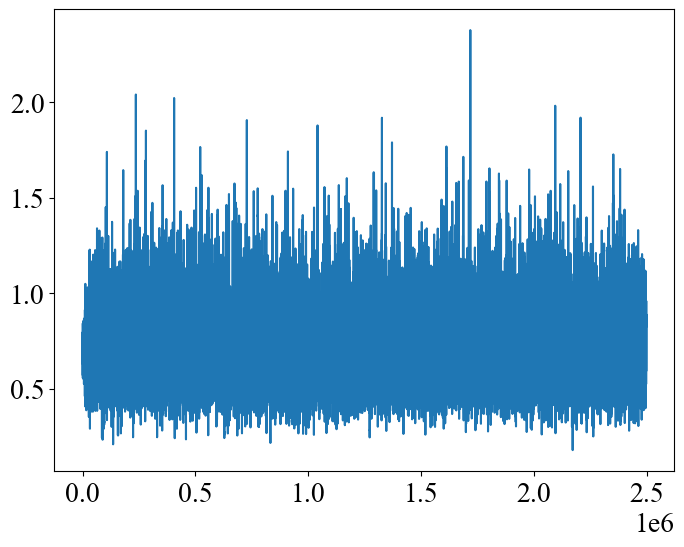

['/Users/caleb/research/Astro_98/lightkurve_data/heavy_data/perio_data/flat/538_flat.pkl']


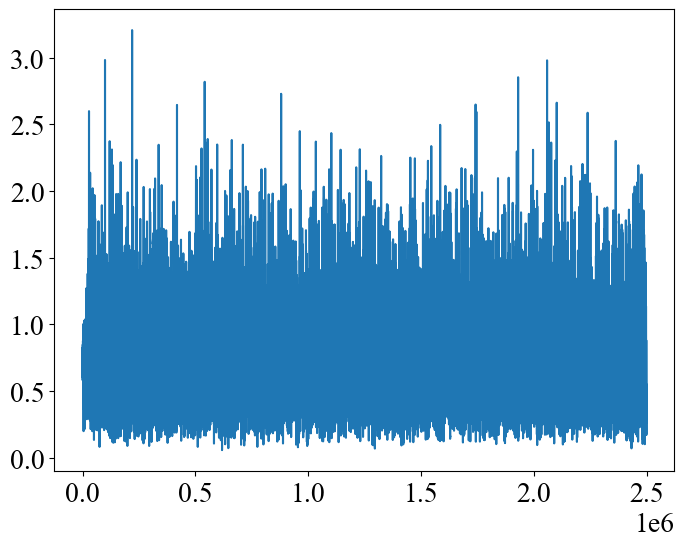

[]
[]
[]
[]
[]
[]
[]
[]
['/Users/caleb/research/Astro_98/lightkurve_data/heavy_data/perio_data/flat/653_flat.pkl']


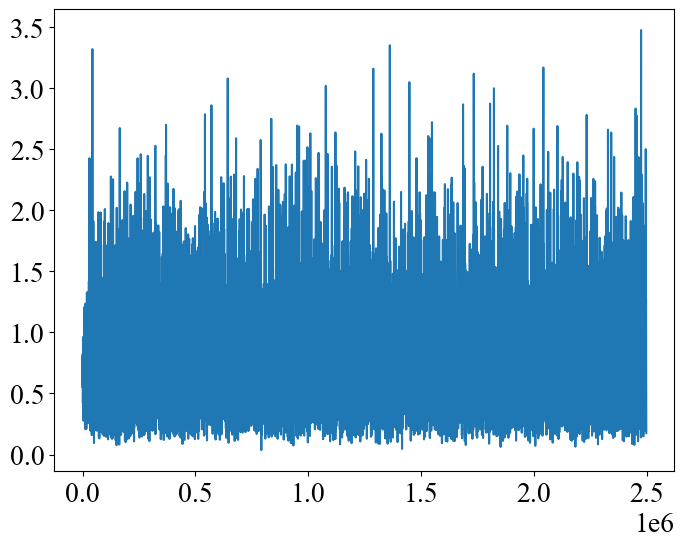

[]
[]
['/Users/caleb/research/Astro_98/lightkurve_data/heavy_data/perio_data/flat/712_flat.pkl']


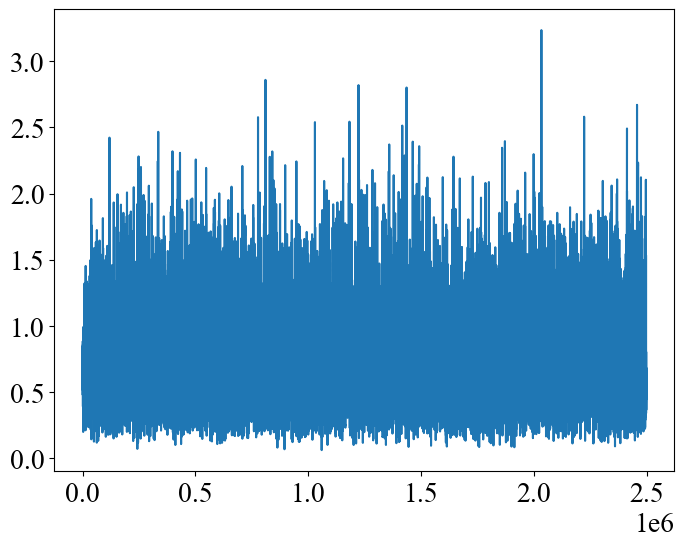

[]
[]
[]
[]
[]
[]
[]
['/Users/caleb/research/Astro_98/lightkurve_data/heavy_data/perio_data/flat/847_flat.pkl']


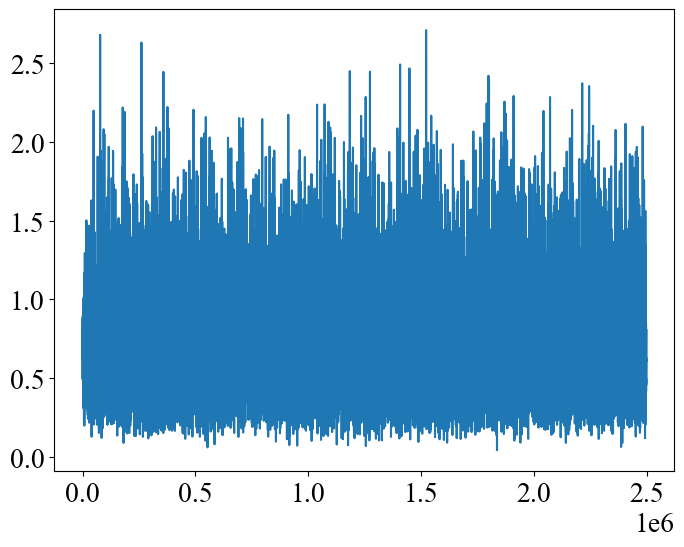

['/Users/caleb/research/Astro_98/lightkurve_data/heavy_data/perio_data/flat/880_flat.pkl']


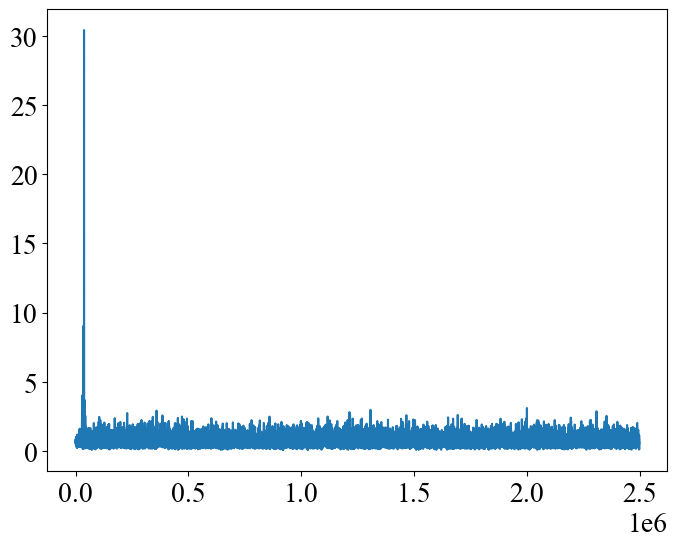

['/Users/caleb/research/Astro_98/lightkurve_data/heavy_data/perio_data/flat/881_flat.pkl']


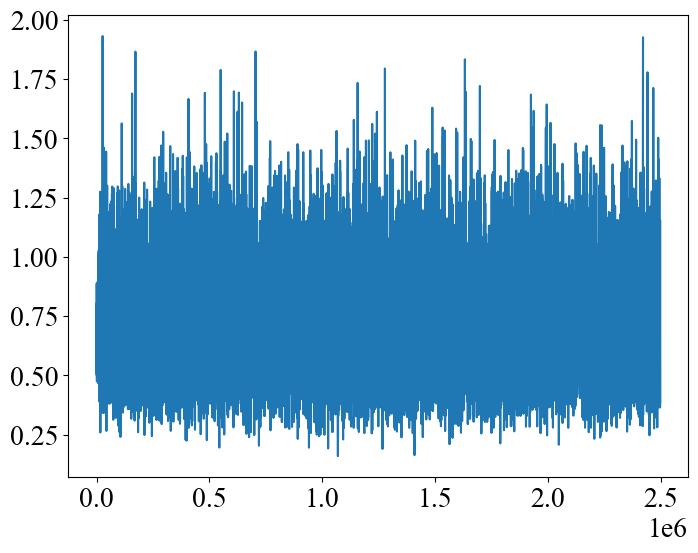

['/Users/caleb/research/Astro_98/lightkurve_data/heavy_data/perio_data/flat/886_flat.pkl']


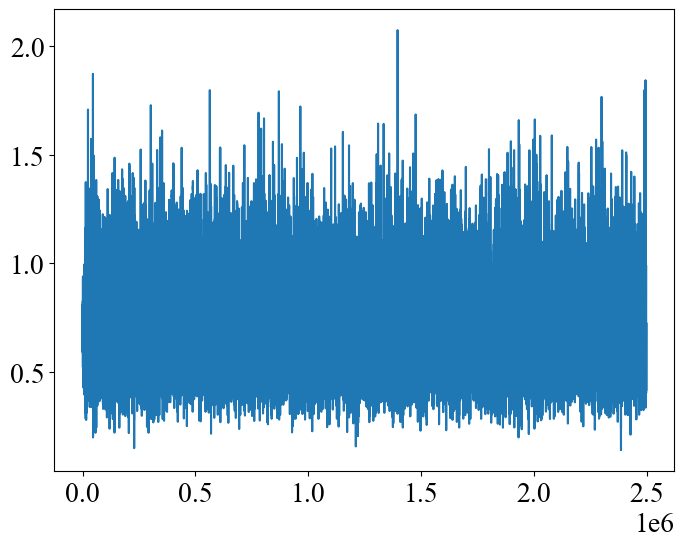

[]
[]
[]
['/Users/caleb/research/Astro_98/lightkurve_data/heavy_data/perio_data/flat/948_flat.pkl']


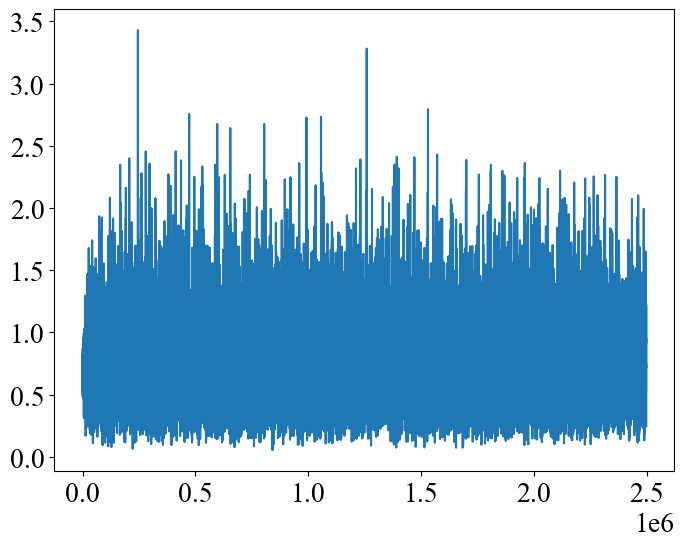

['/Users/caleb/research/Astro_98/lightkurve_data/heavy_data/perio_data/flat/949_flat.pkl']


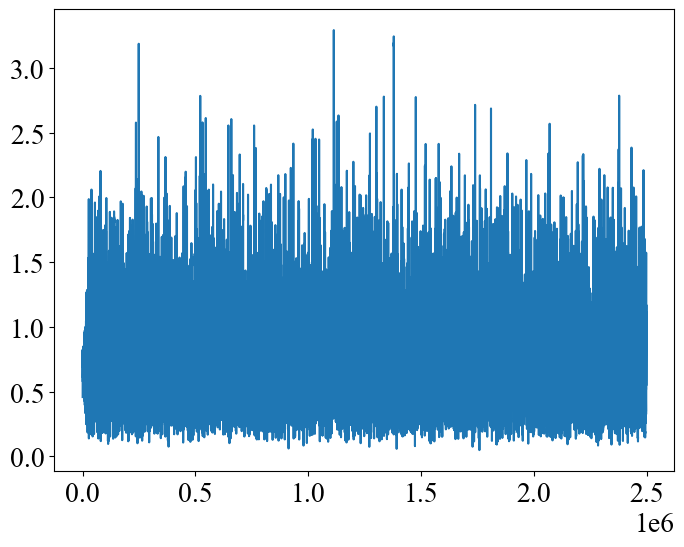

[]
['/Users/caleb/research/Astro_98/lightkurve_data/heavy_data/perio_data/flat/974_flat.pkl']


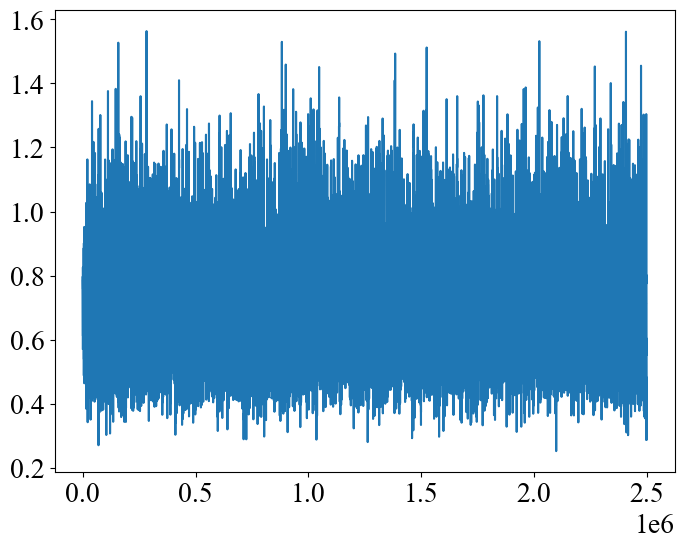

[]
[]


In [137]:
perios = get_paths('flat')
print(len(perios))
all_star_sample['perios'] = perios
clean_m_dwarf_sample = clean_table(all_star_sample)

# mass_bin = .05

subset = clean_m_dwarf_sample[(clean_m_dwarf_sample['Mass']>.425) & (clean_m_dwarf_sample['Mass']<.45)]
print(subset)

perios_subset =subset['perios'].array   
summed_perio = []
for i in perios_subset:
    print(i)
    if len(i) != 0:
        with open(i[0],'rb') as f:
            pw = pickle.load(f)
        plt.plot(np.array(pw))
        plt.show()

998


ValueError: x and y must have same first dimension, but have shapes (269750,) and (1,)

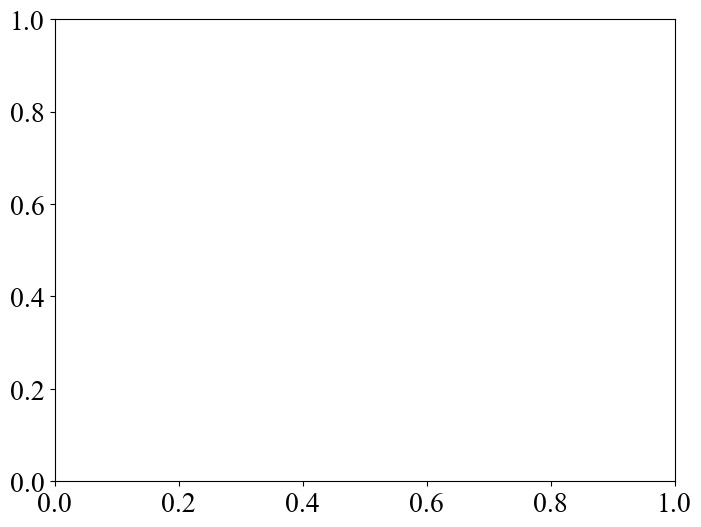

In [124]:
perios = get_paths('flat')
print(len(perios))
all_star_sample['perios'] = perios


subset = all_star_sample[(all_star_sample['Mass']>.425) & (all_star_sample['Mass']<.45)]

# subset = m_dwarf_sample.loc[354]

summed_perio = []
for i in subset['perios']:
    if len(i) != 0:
        with open(i,'rb') as f:
            pw = pickle.load(f)
    summed_perio.append(pw)

    perio_frequency = np.arange(2, 2160,0.008)
    frequency_hz = [(i*10**6)/(24*60*60) for i in np.array(perio_frequency)]
    plt.plot(frequency_hz,pw)
    plt.xlabel("Frequency [uHz]")
    plt.ylabel("Power")
    plt.yscale('log')
    plt.xscale('log')
    plt.show()

summed_perio = sum(summed_perio)
plt.plot(summed_perio,color='red')
plt.xlabel("Frequency [uHz]")
plt.ylabel("Power")
plt.yscale('log')
plt.xscale('log')
plt.show()


(10500.0, 11500.0)

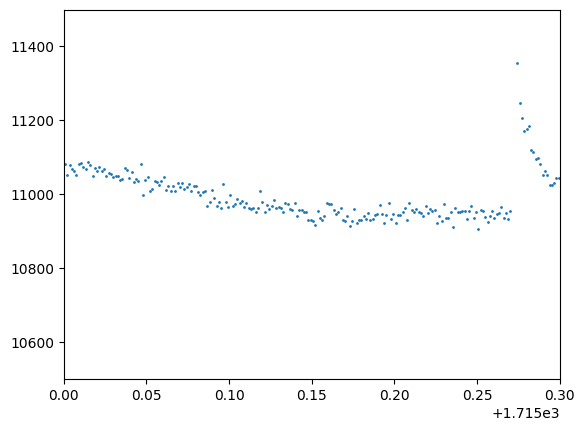

In [377]:
search_result = lk.search_lightcurve('GJ 1243',mission='TESS',exptime='short')
lc = search_result[1].download()
plt.scatter(lc.time.value,np.array(lc['flux']),s=1)
plt.xlim(1715,1715.3)
plt.ylim(10500,11500)

(10500.0, 12000.0)

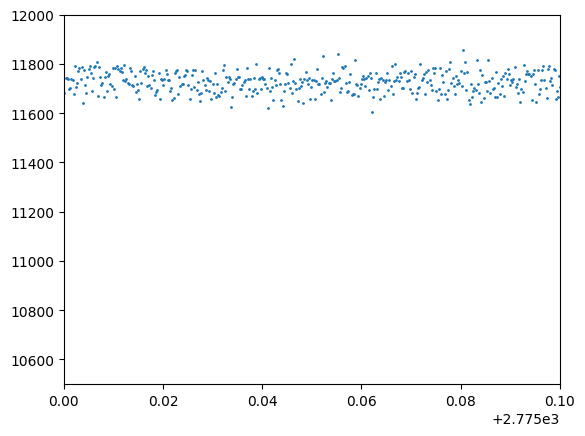

In [374]:
search_result = lk.search_lightcurve('GJ 1243',mission='TESS',exptime='fast')
lc = search_result[1].download()
plt.scatter(lc.time.value,np.array(lc['flux']),s=1)
plt.xlim(2775,2775.1)
plt.ylim(10500,12000)

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

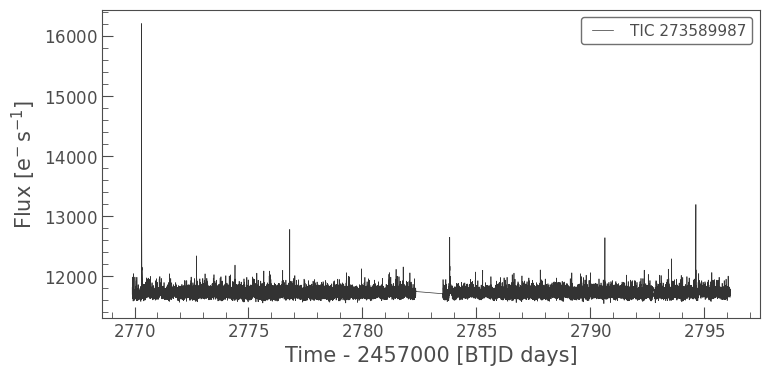

In [360]:
lc = search_result[1].download()
lc.plot()

In [384]:
search_result = lk.search_lightcurve('GJ 1243',mission='Kepler',exptime='short')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 06,2010,Kepler,60,kplr009726699,0.0
1,Kepler Quarter 06,2010,Kepler,60,kplr009726699,0.0
2,Kepler Quarter 10,2011,Kepler,60,kplr009726699,0.0
3,Kepler Quarter 10,2011,Kepler,60,kplr009726699,0.0
4,Kepler Quarter 10,2011,Kepler,60,kplr009726699,0.0
5,Kepler Quarter 12,2012,Kepler,60,kplr009726699,0.0
6,Kepler Quarter 12,2012,Kepler,60,kplr009726699,0.0
7,Kepler Quarter 12,2012,Kepler,60,kplr009726699,0.0
8,Kepler Quarter 13,2012,Kepler,60,kplr009726699,0.0


(570.0, 570.1)

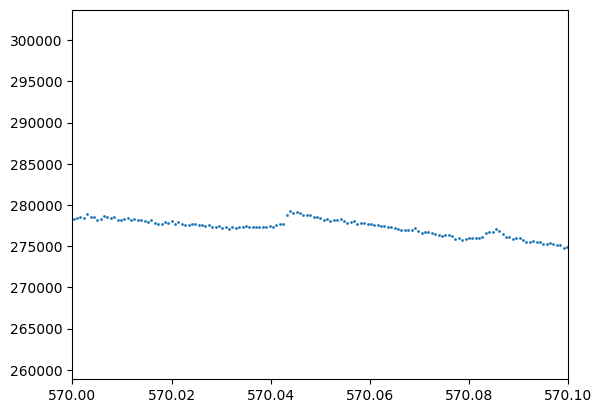

In [387]:
search_result = lk.search_lightcurve('GJ 1243',mission='Kepler',exptime='short')
lc = search_result[1].download()
plt.scatter(lc.time.value,np.array(lc['flux']),s=1)
plt.xlim(570,570.1)
# plt.ylim(27500,12000)